In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import pywt

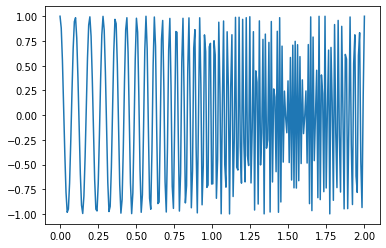

In [8]:
from scipy.signal import chirp, spectrogram

# Define signal
fs = 128.0
sampling_period = 1 / fs
t = np.linspace(0, 2, int(2 * fs))
x = chirp(t, 10, 2, 100, 'quadratic')

plt.plot(t, x)
plt.show()

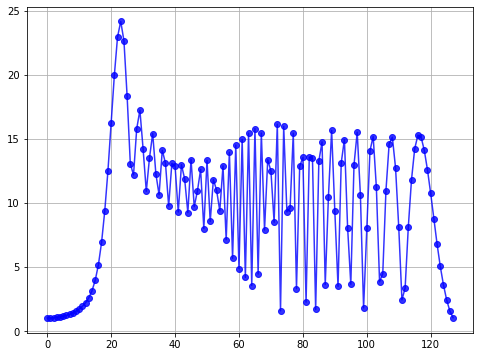

In [18]:
n = len(x)
spectrum = np.fft.fft(x) 
spectrum_magnitude = np.abs(spectrum)
spectrum_magnitude_normalized = np.abs(spectrum) / n
spectrum_phase = np.angle(spectrum)   
spectrum_energy_normalized = np.abs(spectrum) * np.abs(spectrum) / n

plt.figure(figsize=(8,6))
plt.plot(spectrum_magnitude[0:n//2], alpha=0.8, marker='o',color='blue')
plt.grid()
plt.show()

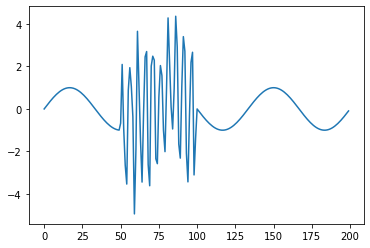

In [41]:
t1 = np.linspace(0, 1, 200, endpoint=False)
sig1  = np.sin(np.pi * 6 * t1)
sing2_f=np.zeros(200)
t2 = np.linspace(0, 1, 50, endpoint=False)
sig2  = 3* np.sin(np.pi * 20 * t2)
noise = np.random.randn(50)
sig2 += noise
for i in range(50,100):
    sing2_f[i]=sig2[i-50]
sig_final = sig1 + sing2_f 




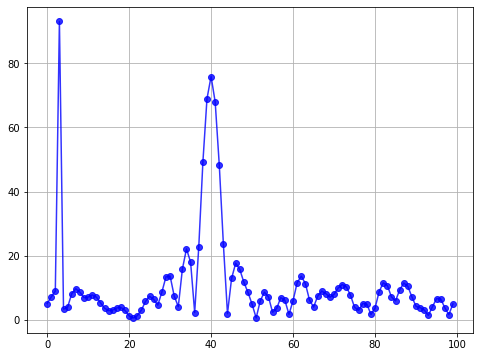

In [58]:
n = len(sig_final)
spectrum = np.fft.fft(sig_final) 
spectrum_magnitude = np.abs(spectrum)
spectrum_magnitude_normalized = np.abs(spectrum) / n
spectrum_phase = np.angle(spectrum)   
spectrum_energy_normalized = np.abs(spectrum) * np.abs(spectrum) / n


plt.figure(figsize=(8,6))
plt.plot(spectrum_magnitude[0:n//2], alpha=0.8, marker='o',color='blue')
plt.grid()
plt.show()

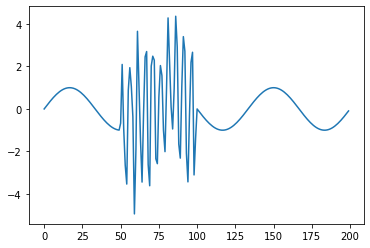

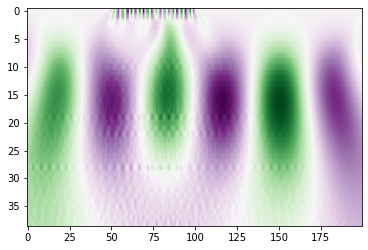

In [64]:
widths = np.arange(1, 40)
cwtmatr, freqs = pywt.cwt(sig_final, widths, 'mexh')

plt.plot(sig_final)
plt.show()

plt.imshow(cwtmatr, cmap='PRGn', aspect='auto')  
plt.show() 

Abrupt changes of the burst that are detected by the shrink wavelet with the scale 1 and 2 
and the slow changes of the sinus wave by stretched wavelets with a scale of 15 up to 25

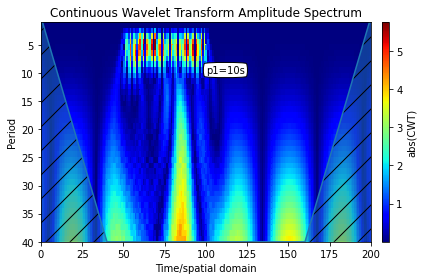

In [66]:
import scaleogram as scg 
scg.set_default_wavelet('mexh')
scales = scg.periods2scales( np.arange(1, 40) )

# and the scaleogram
ax2 = scg.cws(sig_final, scales=scales); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()
